# Pandas

**What is Pandas?**
- Pandas is a powerful and easy-to-use Python library for **data manipulation and analysis.**
- It provides data structures and functions specifically designed to work with **structured data, like tables and time series.**
- Used in:
    - **Data Cleaning:** Handling missing values, filtering, renaming columns, and more.
    - **Data Transformation:** Grouping, merging, pivoting, reshaping.
    - **Data Analysis:** Descriptive statistics, aggregation, and more.
- It is widely used in **data science, data analysis, finance, machine learning,** and more because it makes **handling large datasets convenient and efficient.**

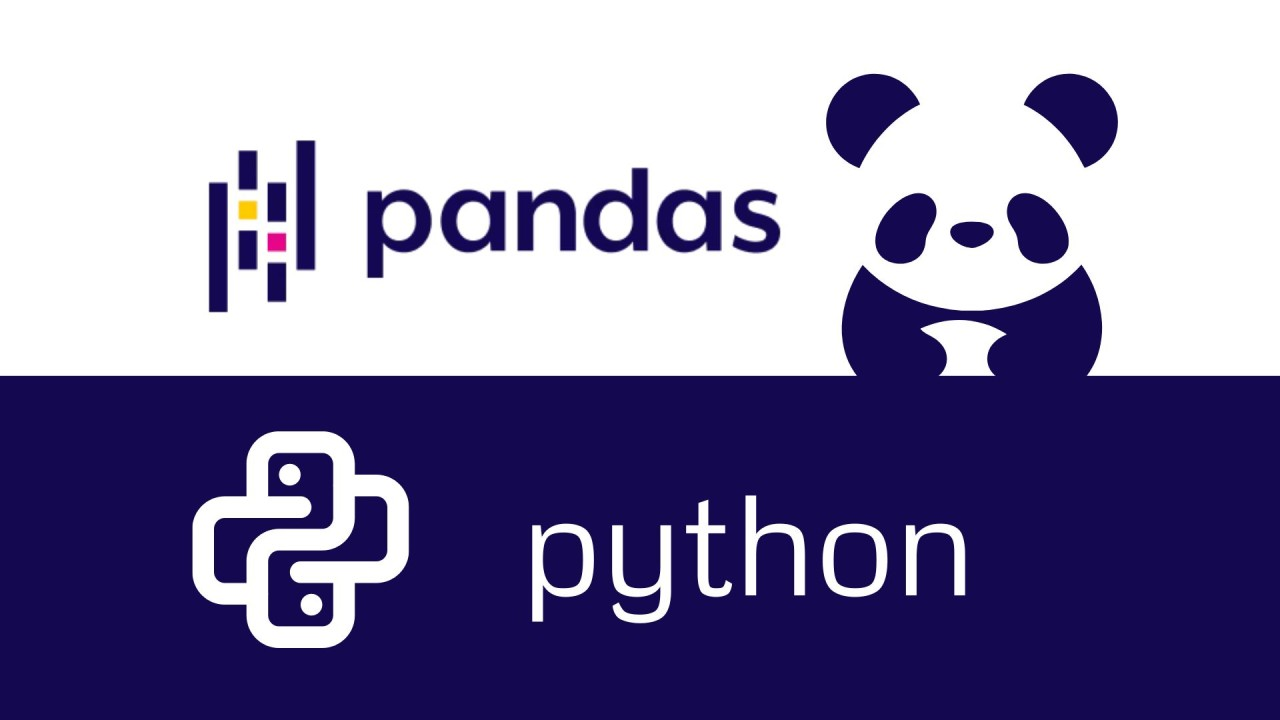

# Installing Pandas 

In [1]:
# !pip install pandas

**Upgrading to the Latest Version**

In [2]:
# !python -m pip install --upgrade pip

# Importing Pandas

In [3]:
import pandas as pd

**This UserWarning is telling us that the version of the bottleneck library we have (1.3.5) is too old, and pandas needs at least version 1.3.6 for optimal performance.**

In [4]:
!pip install --upgrade bottleneck

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Note:**
- Bottleneck is a **performance optimization library** for numerical operations on arrays, especially used alongside NumPy and pandas.

# Why Pandas uses Bottleneck?
- Pandas can internally use bottleneck to speed up operations that involve:

    - **Missing values (NaN)**

    - **Aggregation (mean, sum, std, and more)**

    - **Reductions over arrays (like along a column or row)**

- If bottleneck is installed, pandas will use it automatically. If it’s not there (or outdated), pandas will fall back to slower implementations.

**Checking the latest versions**

In [5]:
print(pd.__version__)

2.2.2


# Data Structures in Pandas

- Pandas provides two types of classes for handling data:

    **1) Series:** a one-dimensional **labeled array** holding data of **any type** such as integers, strings, Python objects.

    **2) DataFrame:** a two-dimensional data structure that holds data like a **two-dimension array or a table with rows and columns.** 

# Series:
   - The axis labels are collectively referred to as **the index.**
   - Data passed to the series object can be:

       - **an ndarray**
       
       - **a Python dictionary.**

       - **a scalar value (like 7)**
   - The passed index is **a list of axis labels.**

In [6]:
import numpy as np

#
- **From ndarray:**
    - If data is an ndarray, index must be **the same length as data.** 
    - If **no index** is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [7]:
# Creating a series object from a random numpy array (ndarray)
ser_arr = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
ser_arr

a   -1.736787
b    0.744652
c   -0.166397
d   -1.684051
e   -0.122630
dtype: float64

- **Printing the indices:**

In [8]:
ser_arr.index   # observe the output(index list) is of 'object' data type

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

- **Random Indexing:**

In [9]:
ser_def_indx = pd.Series(np.random.randn(5))
ser_def_indx

0    0.525165
1   -0.210321
2    2.106447
3   -0.935018
4    2.383550
dtype: float64

- **From a Python Dictionary:**

In [10]:
dic = {"Name": "Alaa", "Age": 23, "Gender": "Female"}

# Creating a series object from a python dictionary.
ser_dic = pd.Series(dic)
ser_dic

Name        Alaa
Age           23
Gender    Female
dtype: object

- **If an index is passed, the values in data corresponding to the labels in the index will be pulled out.**

In [11]:
ser_dic_indx = pd.Series(dic, index=["Name", "Gender", "Faculty"])
ser_dic_indx

Name         Alaa
Gender     Female
Faculty       NaN
dtype: object

- **From Scalar Value:**

In [12]:
ser_scalar = pd.Series(7, index=["a", "b", "c", "d", "e"])
ser_scalar

a    7
b    7
c    7
d    7
e    7
dtype: int64

In [13]:
# Checking the data type
ser_scalar.dtype

dtype('int64')

# Name Attribute
- `Series` also has a `name` attribute:

In [14]:
named_ser = pd.Series(np.random.randn(4), name="Numbers Series")
named_ser

0   -1.263725
1    0.697724
2    0.006422
3    0.583032
Name: Numbers Series, dtype: float64

# DataFrame
- It is a **2-dimensional labeled data structure** with columns of potentially different types. 
- You can think of it like a **spreadsheet or SQL table, or a dict of Series objects.**
- It is generally the most commonly used pandas object. 
- Like Series, DataFrame accepts many different kinds of input.

# 1) From dict of Series or dicts:

- **From a Dictionary of Series:**

In [15]:
dics = {
    "one": pd.Series([1, 2, 3], index=["a", "b", "c"]),
    "two": pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"]),
}
dics

{'one': a    1
 b    2
 c    3
 dtype: int64,
 'two': a    1
 b    2
 c    3
 d    4
 dtype: int64}

In [16]:
# Converting them into a DataFrame
dics_df = pd.DataFrame(dics)
dics_df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


- **Adjusting the indices:**

In [17]:
pd.DataFrame(dics_df, index=["c", "b", "a"])

,one,two
c,3.0,3
b,2.0,2
a,1.0,1


- When a particular **set of columns is passed along with a dict of data,** the passed columns **override the keys in the dict**:

In [18]:
pd.DataFrame(dics_df, index=['c', 'b', 'a'], columns=["two", "three"])

,two,three
c,3,NaN
b,2,NaN
a,1,NaN


- **The row and column labels** can be accessed respectively by accessing the **index and columns attributes:**

In [19]:
dics_df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [20]:
dics_df.columns

Index(['one', 'two'], dtype='object')

- **From a Dictionary of Dictionaries:**

In [21]:
dic_of_dic = {
    "Alice": {"Math": 85, "Physics": 80},
    "Bob": {"Math": 90, "Physics": 89},
    "Charlie": {"Math": 95} 
}
dic_of_dic

{'Alice': {'Math': 85, 'Physics': 80},
 'Bob': {'Math': 90, 'Physics': 89},
 'Charlie': {'Math': 95}}

In [22]:
pd.DataFrame(dic_of_dic)

,Alice,Bob,Charlie
Math,85,90,95.0
Physics,80,89,NaN


# 2) From dict of ndarrays / lists / Tuples:
- All ndarrays **must share the same length.**
- If an index is passed, it must also be the same length as the arrays. 
- If no index is passed, the result will be **range(n), where n is the array length.**

- **From a Dictionary of lists:**

In [23]:
dic_of_lis = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
dic_of_lis

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [24]:
pd.DataFrame(dic_of_lis)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


- **Specifying the Index:**

In [25]:
pd.DataFrame(dic_of_lis, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


- **From ndarray:**

In [26]:
data = np.array([
    [1, 2, 30],
    [3, 4, 50],
    [5, 6, 70]
])

In [27]:
pd.DataFrame(data, index=["a", "b", "c"], columns=["first", "second", "third"])

,first,second,third
a,1,2,30
b,3,4,50
c,5,6,70


- **From a Dictionary of ndarrays:**

In [28]:
data_ndarr = {
    "Voltage": np.array([3.3, 5.0, 12.0]),
    "Current": np.array([0.5, 0.8, 1.2])
}
data_ndarr

{'Voltage': array([ 3.3,  5. , 12. ]), 'Current': array([0.5, 0.8, 1.2])}

In [29]:
pd.DataFrame(data_ndarr)

,Voltage,Current
0,3.3,0.5
1,5.0,0.8
2,12.0,1.2


- **From a Dictionary of Tuples:**

In [30]:
dic_of_tupls = {
    "Name": ("Ahmed", "Youness", "Mohamed"),
    "Age": (25, 30, 35),
    "Department": ("EE", "CS", "ME")
}
dic_of_tupls

{'Name': ('Ahmed', 'Youness', 'Mohamed'),
 'Age': (25, 30, 35),
 'Department': ('EE', 'CS', 'ME')}

In [31]:
pd.DataFrame(dic_of_tupls)

,Name,Age,Department
0,Ahmed,25,EE
1,Youness,30,CS
2,Mohamed,35,ME


- **From a List of Dictionaries:**

In [32]:
lis_of_dics = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
lis_of_dics

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [33]:
pd.DataFrame(lis_of_dics)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [34]:
pd.DataFrame(lis_of_dics, index=["first", "second"], columns=["a", "c"])

,a,c
first,1,NaN
second,5,20.0


# 3) From a Series:
- The result will be a DataFrame with the **same index as the input Series,** and with one column whose name is the original name of the Series (only if no other column name provided).

In [35]:
df_from_ser = pd.Series(range(4), index=list("abcd"), name="Num Ser")
df_from_ser

a    0
b    1
c    2
d    3
Name: Num Ser, dtype: int64

In [36]:
pd.DataFrame(df_from_ser)

,Num Ser
a,0
b,1
c,2
d,3


# Indexing and Selection

In [37]:
# Creating a DataFrame from an existing data
data = {
    'EmployeeID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian', 'Jack'],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance'],
    'Age': [29, 35, 24, 42, 30, 28, 33, 39, 25, 36],
    'Salary': [58000, 67000, 52000, 71000, 60000, 65000, 62000, 70000, 54000, 66000]
}

df = pd.DataFrame(data)
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


# **Slicing Ranges:**

- **With DataFrame, slicing inside of `[]` slices the rows:**
    1) Using `data_frame_name[start:stop]`.
    2) Using `data_frame_name[start:stop:step]`.

In [38]:
df[:]  # selecting (slicing all data)

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [39]:
df[:5]  # slicing only the first 5 rows starting from row '0' (exclusive)

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000


In [40]:
df[:-1]  # slicing all rows except the last one 

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000


- **Negative Indexing:**

In [41]:
df[-5:-2]  # selecting rows from the 5th last row to the 2nd last row, excluding the 2nd last row.

,EmployeeID,Name,Department,Age,Salary
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000


- **Reverse Slicing:**

In [42]:
df[::-1]

,EmployeeID,Name,Department,Age,Salary
9,110,Jack,Finance,36,66000
8,109,Ian,IT,25,54000
7,108,Helen,Marketing,39,70000
6,107,Grace,HR,33,62000
5,106,Frank,Finance,28,65000
4,105,Eva,IT,30,60000
3,104,David,Marketing,42,71000
2,103,Charlie,IT,24,52000
1,102,Bob,Finance,35,67000
0,101,Alice,HR,29,58000


# Selection by Label (Label-Based Indexing)
- **`.loc[]`:**
   - It allows you to access rows and columns by **using their labels (the index or column names)**.
       - **`data_frame_name.loc[row_label, column_label]`.**
   - It includes both **the start and end of the range when slicing. (Inclusive)**
       - **`data_frame_name.loc[start_label:end_label]`.**

- **Accessing Rows and Columns by their labels:**

In [43]:
df.loc[0:5, "Name"]  # Accessing "Name" column of the first 6 rows (from 0 to 5) (Inclusive)

0      Alice
1        Bob
2    Charlie
3      David
4        Eva
5      Frank
Name: Name, dtype: object

- **Observation:**
    - The Resulted output is a Series called **"Name"** which is the **name of the column selected.**

In [44]:
df.loc[:, "Name":"Age"]   # Accessing all rows from the 3 column "Name" , "Department" and "Age"  (Inclusive)

,Name,Department,Age
0,Alice,HR,29
1,Bob,Finance,35
2,Charlie,IT,24
3,David,Marketing,42
4,Eva,IT,30
5,Frank,Finance,28
6,Grace,HR,33
7,Helen,Marketing,39
8,Ian,IT,25
9,Jack,Finance,36


In [45]:
df.loc[9, "Salary"]   # Accessing only the value in the last row of the "Salary" column

66000

- **Slicing using `.loc[]` (Inclusive)**:

In [46]:
df.loc[3:6]  # same as `df.loc[3:6, :]`

,EmployeeID,Name,Department,Age,Salary
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000


- **Important Note:**
    - If the index has **duplicate labels** and either the start or the stop label is **duplicated**, a **KeyError** will be raised.

In [47]:
df_test = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
df_test

0    a
3    b
2    c
5    d
4    e
2    f
dtype: object

In [48]:
df_test.loc[2:5]     # Check the error `KeyError`

KeyError: 'Cannot get left slice bound for non-unique label: 2'

# Selection by Position (Position-Based Indexing)
- **`.iloc[]`:**
   - It allows you to access rows and columns by **using their integer positions (their numeric indices).**
       - **`data_frame_name.iloc[row_position, column_position]`.**
   - It is **exclusive of the end index when slicing.**
       - **`data_frame_name.iloc[start_position:end_position] `.**

- The following code will **raise a `KeyError`** so after detecting it , Try to use `.iloc[]` instead of `.loc[]`.

In [110]:
df.loc[3, 2]

KeyError: 2

In [112]:
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [111]:
df.iloc[3, 2]   # Accessing the 4th row of the 3rd col "Department" 
# Note: 3 and 2 are the indices of the rows and cols respectively

'Marketing'

In [113]:
df.iloc[:3]  # Accessing the first 3 rows (starting from index 0 till index 2 , (Exclusively))

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,58000
1,102,Bob,Finance,35,67000
2,103,Charlie,IT,24,52000


In [114]:
df.iloc[:2, -1] = 1000    # Setting the first 2 rows of the salary column to be "1000"

In [115]:
df   # Original Data Frame is updated (Changed)

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


- **Observation:**
    - **`.iloc[]`:**  returns a **view** of the orignal Data Frame.
        - Which means that adjusting data using `.iloc[]` will update also the original one.
- **Note:**
    - **But not at all the cases.**

- **Select via integer list:**

In [117]:
df.iloc[[0, 5, 7], [2, 3]]  # selecting the 1st , 4th and 6th rows from the 3rd and 4th cols

,Department,Age
0,HR,29
5,Finance,28
7,Marketing,39


# Accessing only 1 element:
- Using **`.iat[]`** for **fast access to a single element** in a DataFrame or Series. 
- It is **integer-location based indexing**, meaning it allows you to access a specific row and column by providing integer index positions.
    - **`data_frame_name.iat[row_index, column_index]`.**

In [121]:
element = df.iat[1, 2]  # Accessing the 2nd element in the 3rd column (only one element).
# Returns a Scalar Value
print("Accessed Element:", element)

Accessed Element: Finance


**Difference between **`.iat[]`** and **`.iloc[]`**:**
   - **`.iat[]`** is specifically for accessing a **single element (faster for this purpose).**
   - **`.iloc[]`** is used for accessing **multiple elements, or slices of data,** by integer-location index (rows and columns).

# Handling out-of-range slice indexes
- Out of range slice indexes are **handled gracefully just as in Python/NumPy.**

In [124]:
x = list('lmnopqrs')
x

['l', 'm', 'n', 'o', 'p', 'q', 'r', 's']

In [131]:
x[4:10]

['p', 'q', 'r', 's']

In [132]:
x[8:10]  # Returns an empty list

[]

In [133]:
x_ser = pd.Series(x)
x_ser

0    l
1    m
2    n
3    o
4    p
5    q
6    r
7    s
dtype: object

In [137]:
x_ser.iloc[2:5]

2    n
3    o
4    p
dtype: object

In [138]:
x_ser.iloc[8:10]  # Returns an empty series

Series([], dtype: object)

- **Note:**
    - Using slices that **go out of bounds** can result in an **empty axis (an empty DataFrame being returned).**

In [141]:
df.iloc[10:12]  # Returns an empty data frame

,EmployeeID,Name,Department,Age,Salary


- **Important Note:**
    - **A single indexer** that is out of bounds will **raise an `IndexError`.** 
    - **A list of indexers** where any element is out of bounds will **raise an `IndexError`.**

In [145]:
df.iloc[10]  # Index Error because of the single indexer which is out of bounds

IndexError: single positional indexer is out-of-bounds

In [148]:
df.iloc[:, 11]

IndexError: single positional indexer is out-of-bounds

- **Check the Error: ==> Single Positional Indexer**** 

In [147]:
df.iloc[[5, 6, 12]]  # Index Error because of the list of indexers which contains the element on index 12 which is not exist.

IndexError: positional indexers are out-of-bounds

# Selection by Callable
- **`.loc[]`, `.iloc[]`, and also `[]`** indexing can **accept a callable as indexer.**
- The callable must be a function with **one argument (the calling Series or DataFrame) that returns valid output for indexing.**

In [150]:
# Creating a Data Frame from a random numpy array of size (6x4) and specifying the index and the columns
df1 = pd.DataFrame(np.random.randn(6, 4), index=list('abcdef'), columns=list('ABCD'))
df1

,A,B,C,D
a,-0.655624,0.095204,0.474352,0.116524
b,-1.577657,-0.414144,1.274587,0.485970
c,-0.485049,-0.976136,-0.856124,-1.060145
d,1.371122,1.120301,-2.058540,-0.063475
e,-1.373317,-0.683904,-0.681831,-0.314177
f,-0.994493,0.963360,-1.175326,-0.540582


In [152]:
df1.loc[lambda df: df['A'] > 0, :]  # Selecting all columns of the row which its column 'A' value > 0

,A,B,C,D
d,1.371122,1.120301,-2.05854,-0.063475


In [153]:
df1.iloc[:, lambda df: [0, 1]]  # Selecting all the rows of the first and second column

,A,B
a,-0.655624,0.095204
b,-1.577657,-0.414144
c,-0.485049,-0.976136
d,1.371122,1.120301
e,-1.373317,-0.683904
f,-0.994493,0.963360


In [164]:
df1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [165]:
df1[lambda df1: df1.columns[0]]  # Returning all the values in the first column (column of index 0)

a   -0.655624
b   -1.577657
c   -0.485049
d    1.371122
e   -1.373317
f   -0.994493
Name: A, dtype: float64

# Selecting Random Samples
- **`.sample()`** method: 
    - Performing a random selection of rows or columns from a Series or DataFrame.
    - It will sample **rows by default, and accepts a specific number of rows/columns to return, or a fraction of rows.**
    - When no arguments are passed, **returns 1 row.**
    - Default: 
        - **Sampling without Replacement**: means that each row will be returned at **most once.**

In [166]:
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [168]:
df.sample()  # Returning only one random row because no arguments are passed.
# every time i run this code, it will randomly select a row

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000


- Specifiying  **number of rows** through **`n`** argument:

In [172]:
df.sample(n=4)  # Selecting only 4 random rows from the dataframe

,EmployeeID,Name,Department,Age,Salary
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
8,109,Ian,IT,25,54000
5,106,Frank,Finance,28,65000


- Selecting a **Fraction of rows** through **`frac`** argument:

In [174]:
df.sample(frac=0.7)  # Selecting 70% of the data 

,EmployeeID,Name,Department,Age,Salary
8,109,Ian,IT,25,54000
7,108,Helen,Marketing,39,70000
6,107,Grace,HR,33,62000
4,105,Eva,IT,30,60000
1,102,Bob,Finance,35,1000
5,106,Frank,Finance,28,65000
3,104,David,Marketing,42,71000


- **Sampling with Replacement:**
    - Through **`replace = True`** argument.

In [180]:
df.sample(n=5, replace=True)  # Observing that row with index 4 is appearing twice.

,EmployeeID,Name,Department,Age,Salary
4,105,Eva,IT,30,60000
3,104,David,Marketing,42,71000
7,108,Helen,Marketing,39,70000
2,103,Charlie,IT,24,52000
4,105,Eva,IT,30,60000


- By default, each row has an **equal probability of being selected.**
- But if you want rows to have **different probabilities,** you can pass the sample function sampling **weights** as weights. 
- These weights can be a **list, a NumPy array, or a Series,** but they must be of the **same length as the object you are sampling.**
- **Missing values** will be treated as a **weight of zero.** 
- If **weights do not sum to 1, they will be re-normalized by dividing all weights by the sum of the weights.**


In [181]:
s = pd.Series([0, 1, 2, 3, 4, 5])

ex_weights = [0, 0, 0.2, 0.2, 0.2, 0.4]

In [184]:
s.sample(n=3, weights=ex_weights)

2    2
3    3
5    5
dtype: int64

- Weights will be **re-normalized automatically.**

In [186]:
ex_weights2 = [0.5, 0, 0, 0, 0, 0]

s.sample(n=1, weights=ex_weights2)  # Number '0' has the greatest probability = 0.5 to be selected

0    0
dtype: int64

- Setting a column of the DataFrame as **sampling weights (we are sampling rows and not columns)** by simply passing the name of the column as a string.

In [188]:
df2 = pd.DataFrame({'col1': [9, 8, 7, 6],
                    'weight_column': [0.5, 0.4, 0.1, 0]})
df2

,col1,weight_column
0,9,0.5
1,8,0.4
2,7,0.1
3,6,0.0


In [191]:
df2.sample(n=3, weights='weight_column')

,col1,weight_column
0,9,0.5
1,8,0.4
2,7,0.1


# Sampling Columns
- **`.sample()`** method also allows users to **sample columns instead of rows** using the **`axis`** argument.
- Benefits of Sampling Columns:
    1) **Feature selection for experimentation.**
    2) **Dimensionality reduction for testing.**
    3) **Exploratory Data Analysis (EDA):**
        - Instead of visually inspecting the whole dataset, **randomly sample a few columns** to analyze patterns or distributions.
    4) **Random feature ensembles: Related to Ensemble Learning.**

In [192]:
df3 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [2, 3, 4]})
df3

,col1,col2
0,1,2
1,2,3
2,3,4


In [196]:
df3.sample(n=1, axis=1)  # Randomly selected one column (n=1) from the data frame

,col2
0,2
1,3
2,4


- We can also set a **seed** for **sample’s random number generator** using the **`random_state`** argument, which will accept either an integer (as a seed) or a NumPy RandomState object (Pseudo number generation).
    - Ensuring **Consistent results across runs.**

In [197]:
df4 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [2, 3, 4]})
df4

,col1,col2
0,1,2
1,2,3
2,3,4


In [198]:
# Specifying the seed so that the sample will always draw the same rows.
df4.sample(n=2, random_state=2)

,col1,col2
2,3,4
1,2,3


In [199]:
# Re-running the same code, the same results will be appeared because of the random seed's consistentency
df4.sample(n=2, random_state=2)

,col1,col2
2,3,4
1,2,3


# Boolean Indexing
- It is the use of **boolean vectors to filter the data.**
- The operators are: **`|`** for **`or`**, **`&`** for **`and`**, and **`~`** for **`not.`** 

- Using a **boolean vector** to index a **Series:** 

In [202]:
s = pd.Series(range(-2, 4))  # creating a series starting from numbers -2 to 4 
s

0   -2
1   -1
2    0
3    1
4    2
5    3
dtype: int64

- Returning a **Boolean Series (same shape as s):**

In [204]:
s > 0    # (Boolean Mask)

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

- Returning a **Filtered Series (only values where the condition is True):**

In [203]:
# Boolean indexing 
s[s > 0]   # Selecting all elements in series which has values greater than 0

3    1
4    2
5    3
dtype: int64

In [206]:
# Multiple boolean conditions
s[(s < -1) | (s > 0.5)]

0   -2
3    1
4    2
5    3
dtype: int64

In [207]:
s[~(s < 0)]   # Returns all elements which are not less than 0 (greater than or equal to 0)

2    0
3    1
4    2
5    3
dtype: int64

- Using a **boolean vector** to index a **Data Frame:**

In [208]:
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [209]:
df["EmployeeID"]   # Returns a pandas Series that contains the values from the `EmployeeID` column of the data frame df.

0    101
1    102
2    103
3    104
4    105
5    106
6    107
7    108
8    109
9    110
Name: EmployeeID, dtype: int64

In [211]:
df['EmployeeID'] > 105   # Returns a Boolean Series 

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: EmployeeID, dtype: bool

In [213]:
df[df['EmployeeID'] > 105]  # Returns all rows which has an 'EmployeeID' > 105

,EmployeeID,Name,Department,Age,Salary
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [221]:
# Multiple Conditions
df[(df['Department'] == "Finance") & (df['Salary'] > 65000)]

,EmployeeID,Name,Department,Age,Salary
9,110,Jack,Finance,36,66000


# Indexing with **`isin()`**

**1) `isin()`** method of **`Series`**:
- Returns a **boolean vector** that is **true** wherever the Series elements **exist in the passed list.**

In [223]:
# Creating a series of numbers from 0 to 5(excluded) with a reversed indices from 5(excluded) to 0
ser_ind = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
ser_ind

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [224]:
s.isin([2, 3, 6])   # Searching if the elements in the list [2, 3, 6] are in the series or not

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [225]:
s[s.isin([2, 3, 6])]  # Returns only the elements which are in the series

4    2
5    3
dtype: int64

**2) `isin()`** method of **`DataFrame`:**

In [227]:
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


In [228]:
values = {'Department': ['IT', 'Finance'], 'Age': [35, 25]}
df.isin(values)

,EmployeeID,Name,Department,Age,Salary
0,False,False,False,False,False
1,False,False,True,True,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,True,True,False
9,False,False,True,False,False


In [229]:
df[df.isin(values)]

,EmployeeID,Name,Department,Age,Salary
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Finance,35.0,NaN
2,NaN,NaN,IT,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,IT,NaN,NaN
5,NaN,NaN,Finance,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,IT,25.0,NaN
9,NaN,NaN,Finance,NaN,NaN


# **`any()` & `all()` functions**

**1) `any()`:**
- **Any value** in the row is in the list.

In [230]:
df.isin(values).any(axis=1)  # Any value in the row is in this values

0    False
1     True
2     True
3    False
4     True
5     True
6    False
7    False
8     True
9     True
dtype: bool

In [231]:
df[df.isin(values).any(axis=1)]  # Returning data (all columns) corresponding to those values

,EmployeeID,Name,Department,Age,Salary
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


**2) `all()`:**
- **All values** in the row is in the list.

In [233]:
df.isin(values).all(axis=1)  # Any value in the row is in this values

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [235]:
df[df.isin(values).all(axis=1)]  # Any value in the row is in this values

,EmployeeID,Name,Department,Age,Salary


- **Observation:**
    - The Returned Data Frame is **Empty** beceause **`all()`** takes rows where all its values are in the list we search in.
    - So,  No row has all these values.

In [236]:
df

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


# `query()` Function
-  Filter a DataFrame using a **string expression,** like writing an **SQL query.** It is more expressive.
    - **`expression`:** A string containing the condition used to filter the DataFrame.
- Can refer to **column names directly (without needing quotes).**

- Without using **query() function:**

In [237]:
df[(df['Department'] == "HR") & (df['Age'] > 30)]  # selecting rows which contains 'HR department' & 'Age' greater than 30

,EmployeeID,Name,Department,Age,Salary
6,107,Grace,HR,33,62000


- Using **`query()`** function:

In [245]:
df.query('Department == "HR" & Age > 30')  # same output is obtained using query() function

,EmployeeID,Name,Department,Age,Salary
6,107,Grace,HR,33,62000


- Difference in Performance between **Indexing** & **`query()`** function:
    - For small DataFrames or basic filtering, **indexing is often faster** because it directly works on the underlying data without any extra overhead.
    - While **query()** can be more readable and useful for complex conditions, it tends to be **slower than direct indexing** due to the **overhead of parsing the query string** and resolving the variables in the context of the DataFrame.

# Setting and Resetting Index
- Setting INdex using **`set_index()`** function.
- Resetting INdex using **`reset_index()`** function.

- **`set_index(keys, drop=True, inplace=False, verify_integrity=False)`** function:
    - Used to **set one or more columns of the DataFrame as the index (row labels).**
    - This is helpful when you want to make a column or columns the index for **faster access or better organization.**
        - **`Keys`:** column(s) to be set an index (indices).
        - **`drop`**: If True, the column(s) will be removed from the DataFrame (not retained as columns). **Default is True.**

        - **`inplace`:** If True, the operation is performed in-place and no new DataFrame is returned. Default is False.

        - **`verify_integrity`:** If True, it checks whether the new index is unique **(raises an error if it’s not).**

In [246]:
df.set_index('EmployeeID')

,Name,Department,Age,Salary
EmployeeID,,,,
101,Alice,HR,29,1000
102,Bob,Finance,35,1000
103,Charlie,IT,24,52000
104,David,Marketing,42,71000
105,Eva,IT,30,60000
106,Frank,Finance,28,65000
107,Grace,HR,33,62000
108,Helen,Marketing,39,70000
109,Ian,IT,25,54000


In [247]:
df   # observe the original data frame is not changing (EmployeeID column is still a column not an index)

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


- Check the solution:
    - Use **`inplace=True`** Argument to **save the changes to the original dataframe.**

In [248]:
df.set_index('EmployeeID', inplace=True)

In [249]:
# Printing the original dataframe to see the changes
df

,Name,Department,Age,Salary
EmployeeID,,,,
101,Alice,HR,29,1000
102,Bob,Finance,35,1000
103,Charlie,IT,24,52000
104,David,Marketing,42,71000
105,Eva,IT,30,60000
106,Frank,Finance,28,65000
107,Grace,HR,33,62000
108,Helen,Marketing,39,70000
109,Ian,IT,25,54000


- The **`EmployeeID`** column is now the **index of the DataFrame.**

In [251]:
df.index  # Verifying that 'EmployeeID' is an index not a column

Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype='int64', name='EmployeeID')

-  **Note:**
    - You can pass a **list of columns** if you want to use **multiple columns as a multi-level index.**

- You can access the data using this index:
    - Using **`.loc[]`** function.
    - Using **`.iloc[]`** function.

In [258]:
df.loc[102]     # Accessing the row with ID index = 102

Name              Bob
Department    Finance
Age                35
Salary           1000
Name: 102, dtype: object

In [260]:
df.loc[[104,106]]  # Accessing multiple rows using indices 104 and 106

,Name,Department,Age,Salary
EmployeeID,,,,
104,David,Marketing,42,71000
106,Frank,Finance,28,65000


In [262]:
df.iloc[-1]    # Accessing the row with the last index number 

Name             Jack
Department    Finance
Age                36
Salary          66000
Name: 110, dtype: object

- **`reset_index(drop=False, inplace=False)`** function:
    - Used to **reset the index of a DataFrame back to the default integer-based index (0, 1, 2, 3, ..).** 
    - **By default, it moves the old index back into columns.**
    - It’s useful when you want to **remove the current index and convert it to a column again.**
        - **`drop`**: If True, it doesn’t add the index as a column (just resets the index). **Default is False.**

        - **`inplace`:** If True, the operation is performed in-place and no new DataFrame is returned. **Default is False.**

In [264]:
df.reset_index(inplace=True)  # Saving changes to the original data frame using `inplace=True` Argument

In [265]:
df 

,EmployeeID,Name,Department,Age,Salary
0,101,Alice,HR,29,1000
1,102,Bob,Finance,35,1000
2,103,Charlie,IT,24,52000
3,104,David,Marketing,42,71000
4,105,Eva,IT,30,60000
5,106,Frank,Finance,28,65000
6,107,Grace,HR,33,62000
7,108,Helen,Marketing,39,70000
8,109,Ian,IT,25,54000
9,110,Jack,Finance,36,66000


- After Resetting the INdex , **`EmployeeID`** which was an INdex has become a **column.**

# Concatenating, Merging & Joining

# Concatenating:
- **`.concat()`** function:
    -  Used to **concatenate (stack)** DataFrames either **along rows (vertically) or columns (horizontally)**.
    - It works by simply **adding DataFrames together without requiring matching columns or indexes.**
    - Arguments:
        - **`axis`:** Specifies whether to concatenate along **rows (axis=0)** or **columns (axis=1).** Default: **axis=0 (Rows).**

        - **`join`:** Determines how to handle indexes that don’t match whether **'outer' or 'inner'.**

        - **`ignore_index`:** If **True, it resets the index in the resulting DataFrame.**

In [273]:
df_con1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }, index=[0, 1, 2, 3])
df_con1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [274]:
df_con2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7])
df_con2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [275]:
df_con3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11])
df_con3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### Concatenating 3 DataFrames (stacking) across **Rows** (axis=0):

In [276]:
concatenated_df = pd.concat([df_con1, df_con2, df_con3], axis=0)  # Stacking them Vertically (Across Rows)
concatenated_df

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- **Note:**
    - **`.concat()`** makes a full copy of the data.

# Merging:
- **`.merge(df1, df2, on=' ', left_on=' ', right_on=' ')`** function:
    - Used to **combine two DataFrames based on a common column or index,** similar to SQL joins.
    - Gives you flexibility in how the rows are combined, including options for inner, outer, left, and right joins.
    - Arguments:
        - **`df1`:** Left DataFrame.
        - **`df2`:** Right DataFrame.
        - **`how`:** Specifies how to merge:
            - **`inner`:** Only matching rows from both DataFrames.**(Default)**
            - **`outer`:** All rows, with missing values filled with NaN.
            - **`left`:** All rows from the left DataFrame and matching rows from the right.
            - **`right`:** All rows from the right DataFrame and matching rows from the left.
        - **`on`:** Column name(s) to join on.
        - **`left_on`:** Column name(s) from the left DataFrame to join on.
        - **`right_on`:** Column name(s) from the right DataFrame to join on.
        - **`left_index`:** Use the index of the left DataFrame for joining.
        - **`right_index`:** Use the index of the right DataFrame for joining.

In [286]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3", "K4"],
        "A": ["A0", "A1", "A2", "A3", "A4"],
        "B": ["B0", "B1", "B2", "B3", "B4"],
    })
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K4,A4,B4


In [287]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3", "K6"],
        "C": ["C0", "C1", "C2", "C3", "C6"],
        "D": ["D0", "D1", "D2", "D3", "D6"],
    }
)
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K6,C6,D6


### Merging Left and Rights dataframes **based on 'Key' Column:**

- **Inner Join:**
    - Only matched rows from both DataFrames.

In [291]:
inner_result = pd.merge(left, right, on="key", how='inner')  # same as not specifying how='inner' argument because it is the Default
inner_result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


- **Observe:**
    - Only matching rows from both DataFrames are appeared **(inner join).**

- **Outer Join:**
    - All rows, with missing values filled with NaN.

In [292]:
outer_result = pd.merge(left, right, on="key", how='outer')  
outer_result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A4,B4,NaN,NaN
5,K6,NaN,NaN,C6,D6


- **Left join:**
    - All rows from the **left DataFrame and matching rows from the right.**

In [294]:
left_result = pd.merge(left, right, on="key", how='left')  
left_result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A4,B4,NaN,NaN


- **Right join:**
    - All rows from the **Right DataFrame and matching rows from the left.**

In [296]:
right_result = pd.merge(left, right, on="key", how='right')  
right_result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K6,NaN,NaN,C6,D6


# Joining (Default: Index-Based)

- **`.join()`** method:
    - Used to join two DataFrames by **their index or by a column in one DataFrame (if specified) to the index of the other.** 
    - It’s generally **simpler than merge() for joining based on the index.**
    - Also supports **`on=`** to join on a column.

In [297]:
left_jn = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)
left_jn

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [298]:
right_jn = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
right_jn

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [300]:
resulted_jn = left_jn.join(right_jn)
resulted_jn

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


- Keeping **all rows from left_jn.**

- **Adds columns from right_jn wherever indexes match.**

- **If no match → fills with NaN.**

# Importing Data From Multiple Sources
- **CSV File: `.read_csv()`.**
- **Excel File: `.read_excel()`.**
- **JSON File: `.read_json()`.**
- **SQL Databases: `.read_sql_query()`.**
- **HTML Table: `.read_html()`.**

- Reading a CSV File:
    - Using **`pd.read_csv(file_path\\file_name.csv)`**

In [303]:
data = pd.read_csv("C:\\Users\\Alpha\\IEEE-ML-2025\\StudentsPerformance.csv")
data      

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


- **Observe that:**
    - The file path is: **`c:\Users\Alpha\IEEE-ML-2025\file_name.csv`**.
    - To run this you need to add another back slash **`\`** to tell python to escape the original **`\`** which included inside the file path.
    - **Another Solution:**
        - Use the prefix **`r""`** which stands for a **raw string literal in Python**, telling python not to treat backslashes **`\`** as escape characters. 

In [304]:
data = pd.read_csv(r"C:\Users\Alpha\IEEE-ML-2025\StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


- Note:
    - When you **read a dataset from a CSV** file using **`pandas`**, it is typically loaded into a **DataFrame.** 

# Changing Display Settings
- To display all the data in a DataFrame **instead of dots `(...)`**, you can change the Pandas display settings.
- Using:
    - **`pd.set_option()`** function.

### Displaying all Columns

In [305]:
pd.set_option("display.max_columns", None)

- Note:
    - **`None`** = **`No limit`** (showing all columns, regardless of how many there are).
    - You can set this to a **specific number like 5** which means **displaying only the first 5 columns** in the dataset.

In [306]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Displaying all Rows

In [307]:
pd.set_option("display.max_rows", None)

In [308]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


- **Take Care:**
    - Expanding all the rows may impact performance, especially when working with large datasets. 
    - It can slow down further operations and make the notebook harder to navigate.

### Resetting to Default

In [309]:
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

In [310]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Data Exploration
- The phase where you get to understand your dataset, its structure, patterns, and potential issues.

### Basic Information:
- **`.head()`:** First 5 rows (Default)
- **`.tail()`:** Last 5 rows  (Default)
- **`.shape`:**  Rows and columns
- **`.columns`:** Column names
- **`.dtypes`:** Data types of each column
- **`.info()`:** Structure, data types, nulls

In [313]:
data.head()  # displaying the first 5 rows 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [314]:
data.head(7)  # displaying the first 7 rows 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [315]:
data.tail()   # displaying the last 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [316]:
data.shape   # Note: shape here is an attribute not a function so that no parenthesis are needed.

(1000, 8)

- **`.shape`** returns **(No.of  Rows x No.of Cols).**

In [318]:
data.columns   # Returns the name of each column in the dataframe

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

- The **`Index`** is a special data structure in Pandas that is similar to an array.
    - It **holds the labels for the rows or columns in the DataFrame.**
- **`dtype='object'`** tells you the data type of the elements in the Index.
    - In this case, the data type is **object, which means the elements (the column names) are strings.**

In [319]:
data.dtypes    # Returns the data type of each column individually

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- Note:
    - **Checking the Data Types** of each column in the dataframe **is a must** because if you have a column contains **numbers (values) and its data type is `object` or `str`** so you must convert it into the appropriate data type say **`float` or `int`** (depending on the values inside that column) to perform some calculations on them.

- In this Data frame: No need for converting any data types of the columns.

### Convrting from Data Type to Another
- Using **`.astype(new_data_type)`** function:
    - Example: **`data['column_name'].astype('int')`** ==> This converts the data type of the specified column into **`int`.**

- **`.info()`** shows:
    - Range of indix from index no... to index no...
    - No.of Columns.
    - The data type of each Column.
    - Size of this dataset in Memory.
    - No.of Not null values in each column = No.of values exist in the dataset.

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking for Duplicates
- Checking for duplicates in a DataFrame is important when cleaning your data, as duplicates can **skew analysis and lead to incorrect results.**

- **Checking for Duplicate Rows:**
    - Using **`.duplicated()`** function.

In [322]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [323]:
# We need to check No.of duplicates across all the dataset = Summing over all these resulted True values.
data.duplicated().sum()    # Returns 0 which indicated this dataset has no duplicates.

0

In [325]:
# Showing the duplicates if exist
data[data.duplicated]   # Returns an empty Data Frame as we don`t have any duplicates here

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


- Note:
    - If there is any duplicates, you should remove (drop) them using:
        - **`.drop_duplicates`**

# Checking for Missing Values
- Using **`.isnull()`** function.

In [326]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [327]:
# We need to sum over all the True values in the data frame (Counting the No.of null values)
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There is No Null values here.

# Checking for Non-Missing Values 
- Using **`.notnull()`** function

In [328]:
data.notnull().sum()  # We found that at each column, There are 1000 not null values = 1000 rows present in this dataset(Indicating No Missing Values) 

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

# Descriptive Statistics
- They summarize and describe the main features of a dataset. 
- They are important for understanding **the central tendency, spread, and overall distribution of your data.**
- Using **`.describe()`** function which generates a summary of descriptive statistics for numerical columns by default as:
    - **`Count`:** The number of non-null values.
    - **`Mean`:** The average value.
    - **`Standard Deviation (std)`:** The measure of the spread of data.

    - **`Min`:** The minimum value.

    - **`25%`:** The first quartile (Q1), or the 25th percentile.

    - **`50%`:** The median or the 50th percentile (Q2).

    - **`75%`:** The third quartile (Q3), or the 75th percentile.

    - **`Max`:** The maximum value.

In [329]:
data.describe()    # For numerical columns 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Using **`.describe(include='object')`: for columns of `object` data type**
    - **`count`:** The number of non-null entries in the column.

    - **`unique`:** The number of unique values in the column.

    - **`top`:** The most frequent value in the column.

    - **`freq`:** The frequency of the most frequent value.

In [331]:
data.describe(include ='object')   # For columns of 'object' data type

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [332]:
# Getting the mean of the 'math score' column
data['math score'].mean()

66.089

# Unique Values
- Using **`.unique()`** function: 
    - Returns an array of **unique values** found in the specified column.

In [336]:
# Getting unique values in the 'lunch' column
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [337]:
# Getting unique values in the 'test preparation course' column
unique_courses = data['test preparation course'].unique()
print("Unique values in 'Test Preparation Course':", unique_courses)

Unique values in 'Test Preparation Course': ['none' 'completed']


- Getting the **Number of these Unique Values:**
    - Using **`.nunique()`** function.

In [338]:
data['lunch'].nunique()

2

# Counting the Frequency of Unique Values
- Using **`.value_counts()`** function: **(For Categorical Data)**
    - Returns a Series with the **unique values as the index and their corresponding counts as the values.**
    - Used for exploring **Categorical Data.**

In [339]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

- **By default:**
    - The results are **sorted in descending order by frequency.**
    - If you want to sort them in **ascending order,** you can use the **`ascending=True`** parameter.

In [341]:
data['parental level of education'].value_counts(ascending=True)

parental level of education
master's degree        59
bachelor's degree     118
some high school      179
high school           196
associate's degree    222
some college          226
Name: count, dtype: int64

- You can **normalize the counts** to show the **relative frequencies (as proportions)** instead of raw counts using:
    - **`normalize=True parameter`.**

In [342]:
data['parental level of education'].value_counts(normalize=True)

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64

# Data Manipulation
- Process of transforming, modifying, and cleaning your data to make it more useful for analysis.
- Common data manipulation tasks:
    - Renaming Columns.
    - Changing Data Type.
    - Handling Missing data.
    - Sorting Data.
    - Adding or Modifying Columns.
    - Aggregation and Grouping.
    - Merging, Joining, and Concatenating DataFrames.
    - Pivoting and Reshaping.

### Renaming Columns 
- Using **`.rename(columns={'old_col_name': 'new_col_name'})`** function.

In [343]:
data.rename(columns={'race/ethnicity': 'Ethnicity'}, inplace=True)
# uisng inplace=True ==> To save changes make to the original data frame

In [346]:
data.columns    # The specified column was renamed successfully

Index(['gender', 'Ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Sorting Data
- Using **`.sort_values(by='col_name', ascending=True)`.**
- Default: **`ascending=True`**.

In [352]:
# Sorting by 'math score' column in descending order and saving it in a new dataframe named 'df_sorted'
df_sorted = data.sort_values(by='math score', ascending=False)
df_sorted

,gender,Ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [354]:
# Sort by multiple columns (descending reading score, ascending writing score)
df_sorted_multi = data.sort_values(by=['reading score', 'math score'], ascending=[False, True])
df_sorted_multi

,gender,Ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
381,male,group C,associate's degree,standard,completed,87,100,95
970,female,group D,bachelor's degree,standard,none,89,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22
980,female,group B,high school,free/reduced,none,8,24,23
596,male,group B,high school,free/reduced,none,30,24,15
327,male,group A,some college,free/reduced,none,28,23,19


- **Columns Ordering matter in the list of `ascending` argument.** 

### Adding Columns (Feature Engineering)

In [357]:
# Adding a new column 'Total Score' by summing other columns
data['Total Score'] = data['math score'] + data['reading score'] + data['writing score']

In [358]:
# Then Printing the original data 
data

,gender,Ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


# Aggregation & Grouping
- To summarize and analyze data by applying functions (like sum, mean, count, ..) to different subsets of the data.

### Grouping Data using:
- **`.groupby()`**:
    - To group your data **by one or more columns** and then perform an **operation on each group.**

- Grouping by the **"gender"** column to calculate the **average math scores for each gender.**

In [366]:
data.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

### Multiple Aggregations

In [373]:
# Group by 'parental level of education' and apply multiple aggregation functions (mean and sum)
multi_agg = data.groupby('parental level of education').agg({
    'math score': ['mean', 'sum'],
    'reading score': ['mean', 'sum'],
    'writing score': ['mean', 'sum']
})
multi_agg

math score        reading score         \
                                  mean    sum          mean    sum   
parental level of education                                          
associate's degree           67.882883  15070     70.927928  15746   
bachelor's degree            69.389831   8188     73.000000   8614   
high school                  62.137755  12179     64.704082  12682   
master's degree              69.745763   4115     75.372881   4447   
some college                 67.128319  15171     69.460177  15698   
some high school             63.497207  11366     66.938547  11982   

                            writing score         
                                     mean    sum  
parental level of education                       
associate's degree              69.896396  15517  
bachelor's degree               73.381356   8659  
high school                     62.448980  12240  
master's degree                 75.677966   4465  
some college                    68.840708  15558  
some high school                64.888268  11615

- **The mean total score by ethnicity:**

In [376]:
eth_by_score = data.groupby('Ethnicity')['Total Score'].mean()
eth_by_score

Ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: Total Score, dtype: float64

In [379]:
# Sorting values descending by 'Total Score' Column
eth_by_score.sort_values(ascending=False)

Ethnicity
group E    218.257143
group D    207.538168
group C    201.394984
group B    196.405263
group A    188.977528
Name: Total Score, dtype: float64

# Aggregation using Pivot Tables
- To perform aggregation in a more flexible way using:
    - **`.pivot_table((values, index, columns, aggfunc))`** 
        - **`values`:** The **column(s) to aggregate (sum, mean, ...).**
        - **`index`:** The column to use as the **row index** in the pivot table.
        - **`columns`:** The column to use as the **column labels** in the pivot table.
        - **`aggfunc`:** The aggregation function to apply (mean, sum, count, etc.). **By default, it is mean.**

In [383]:
# pivot table to calculate the average total score by Ethnicity and Gender
pivot = data.pivot_table(values='Total Score',
                         index='Ethnicity',
                         columns='gender', aggfunc='mean')   #'gender' column acts as a label
pivot

gender,female,male
Ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


- Creating a pivot table with **`gender`** and **`test preparation course`** as **index** and **average scores as values.**

In [381]:
pivot_table = data.pivot_table(values=['math score', 'reading score', 'writing score'], 
                             index=['gender', 'test preparation course'], 
                             aggfunc='mean')

pivot_table

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

- Creating the **Same Table** but by using **`.groupby()`:**

In [384]:
data.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

- By using **both in the same analysis**, you can efficiently calculate **various statistics and gain insights** from your data.